<a href="https://colab.research.google.com/github/mohammad-sagher/classfication/blob/main/Prediction_student_grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# تثبيت المكتبات اللازمة
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# تأكد من استخدام GPU إذا كانت متاحة
print("GPU متاح: ", tf.config.list_physical_devices('GPU'))

GPU متاح:  []


In [ ]:
# تحميل البيانات (استبدل برابط ملفك على Google Drive إذا كان متاحًا)
# يمكن أيضًا تحميل الملف مباشرة إلى Colab
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('اسم_الملف.csv')

# يمكننا أيضًا تحميل البيانات من رابط مباشر
# df = pd.read_csv('رابط_ملف_البيانات.csv')

# بدلاً من ذلك، نستخدم الملف الذي رفعته إلى Colab
df = pd.read_csv('enhanced_student_habits_performance_dataset.csv')

# عرض معلومات البيانات
print(f"حجم البيانات: {df.shape}")
print("\nمعلومات عن البيانات:")
print(df.info())

# عرض الإحصائيات الوصفية للبيانات الرقمية
print("\nإحصائيات وصفية للبيانات الرقمية:")
print(df.describe())

# عرض أول 5 صفوف من البيانات
print("\nأول 5 صفوف من البيانات:")
print(df.head())

# التحقق من القيم المفقودة
print("\nعدد القيم المفقودة في كل عمود:")
print(df.isnull().sum())

حجم البيانات: (80000, 31)

معلومات عن البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12

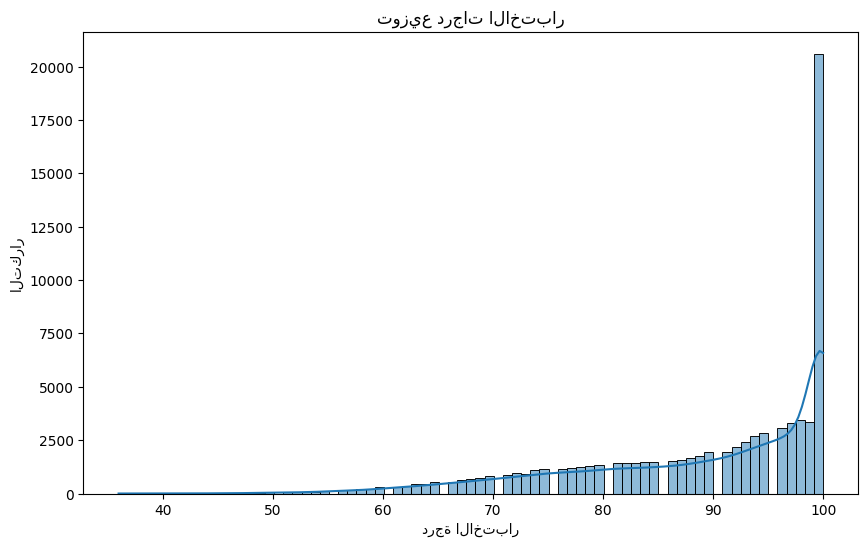

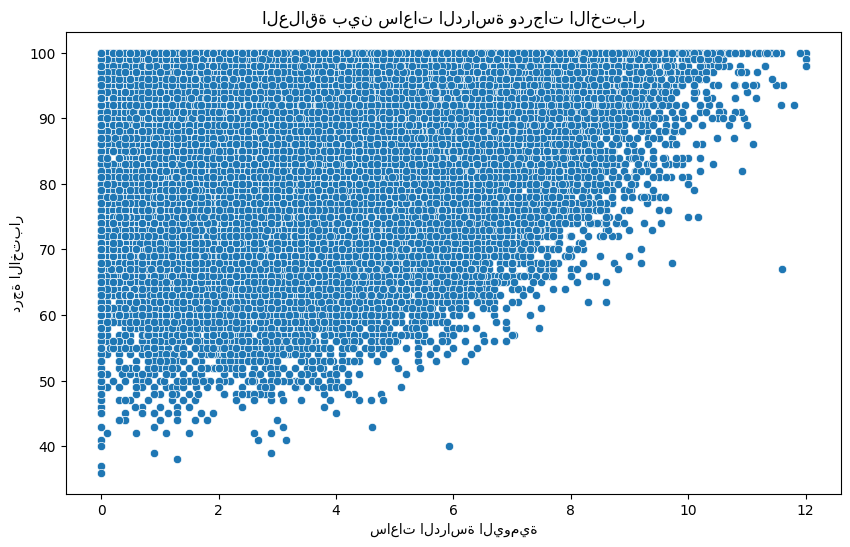

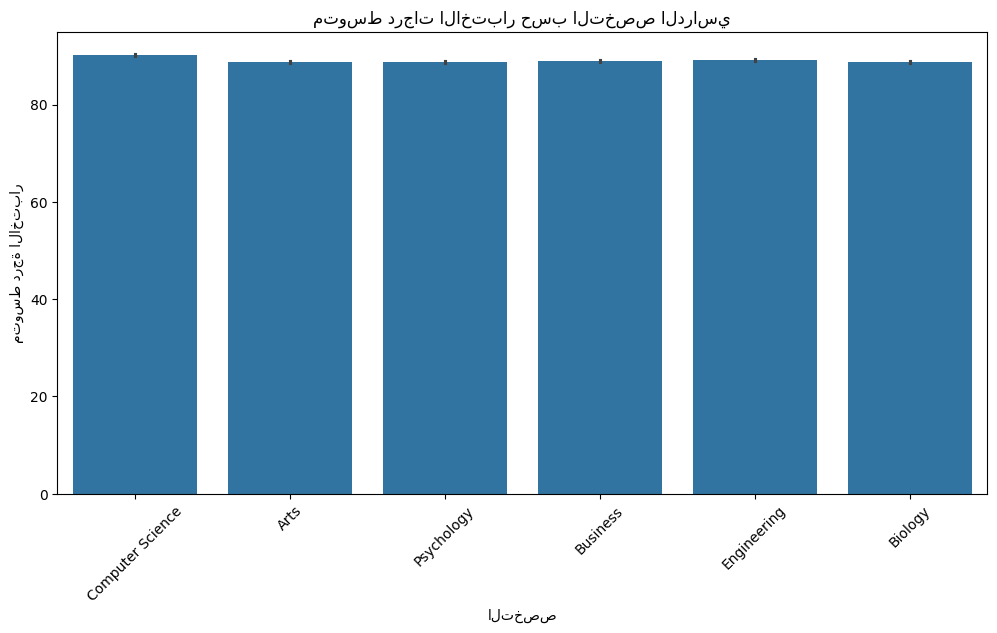

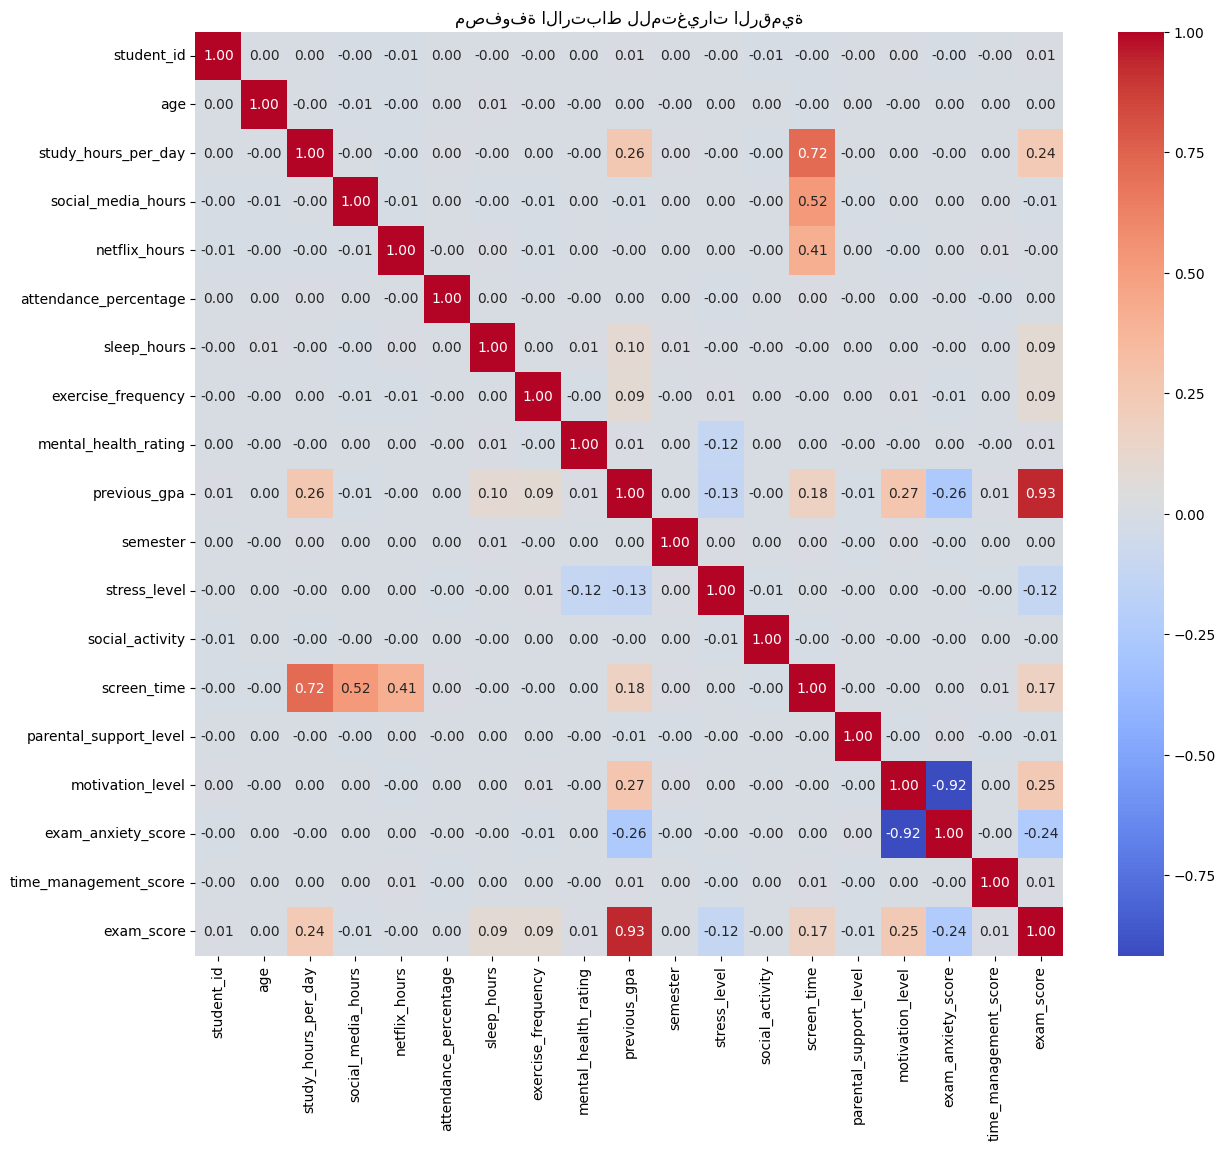

In [ ]:
# توزيع درجات الاختبار (المتغير التابع)
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True)
plt.title('توزيع درجات الاختبار')
plt.xlabel('درجة الاختبار')
plt.ylabel('التكرار')
plt.show()

# العلاقة بين ساعات الدراسة ودرجات الاختبار
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('العلاقة بين ساعات الدراسة ودرجات الاختبار')
plt.xlabel('ساعات الدراسة اليومية')
plt.ylabel('درجة الاختبار')
plt.show()

# متوسط درجات الاختبار حسب التخصص الدراسي
plt.figure(figsize=(12, 6))
sns.barplot(x='major', y='exam_score', data=df)
plt.title('متوسط درجات الاختبار حسب التخصص الدراسي')
plt.xlabel('التخصص')
plt.ylabel('متوسط درجة الاختبار')
plt.xticks(rotation=45)
plt.show()

# مصفوفة الارتباط (للمتغيرات الرقمية فقط)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 12))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('مصفوفة الارتباط للمتغيرات الرقمية')
plt.show()

In [ ]:
# 1. فصل المتغير التابع عن المتغيرات المستقلة
X = df.drop(['student_id', 'exam_score'], axis=1)  # حذف معرف الطالب ودرجة الاختبار (المتغير التابع)
y = df['exam_score']

# 2. تحديد أنواع المتغيرات
# المتغيرات الرقمية
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# المتغيرات الفئوية
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("المتغيرات الرقمية:", numeric_features)
print("المتغيرات الفئوية:", categorical_features)

# 3. إنشاء معالج للبيانات باستخدام ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"حجم مجموعة التدريب: {X_train.shape[0]} سجل")
print(f"حجم مجموعة الاختبار: {X_test.shape[0]} سجل")

# 5. تطبيق معالجة البيانات
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"أبعاد بيانات التدريب بعد المعالجة: {X_train_processed.shape}")

المتغيرات الرقمية: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score']
المتغيرات الفئوية: ['gender', 'major', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range', 'learning_style']
حجم مجموعة التدريب: 64000 سجل
حجم مجموعة الاختبار: 16000 سجل
أبعاد بيانات التدريب بعد المعالجة: (64000, 57)


In [ ]:
# 1. بناء نموذج الشبكة العصبية
def create_model(input_dim):
    model = Sequential([
        # طبقة الإدخال مع تنظيم وحدات الدُفعة
        Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # الطبقات المخفية
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        # طبقة الإخراج (نتوقع قيمة واحدة وهي درجة الاختبار)
        Dense(1)
    ])

    # تجميع النموذج
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# إنشاء النموذج
input_dim = X_train_processed.shape[1]  # عدد المدخلات بعد المعالجة
model = create_model(input_dim)

# طباعة ملخص النموذج
model.summary()

# 2. تدريب النموذج
# تحديد آليات المراقبة أثناء التدريب
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_student_exam_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# تدريب النموذج
history = model.fit(
    X_train_processed, y_train,
    epochs=50,  # يمكن زيادتها لنتائج أفضل
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,857 (226.00 KB)

 Trainable params: 56,961 (222.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
795/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6616.0322 - mae: 79.8964
Epoch 1: val_loss improved from inf to 482.34607, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 6600.1274 - mae: 79.7698 - val_loss: 482.3461 - val_mae: 21.4116
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 229.1990 - mae: 12.4404
Epoch 2: val_loss improved from 482.34607 to 19.86127, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 229.0768 - mae: 12.4361 - val_loss: 19.8613 - val_mae: 3.4523
Epoch 3/50
794/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.7638 - mae: 6.6128
Epoch 3: val_loss improved from 19.86127 to 19.15732, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 69.7485 - mae: 6.6121 - val_loss: 19.1573 - val_mae: 3.4896
Epoch 4/50
796/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.2393 - mae: 6.2765
Epoch 4: val_loss improved from 19.15732 to 18.39786, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 62.2342 - mae: 6.2762 - val_loss: 18.3979 - val_mae: 3.3346
Epoch 5/50
798/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.2617 - mae: 6.0968
Epoch 5: val_loss improved from 18.39786 to 18.31530, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 59.2599 - mae: 6.0968 - val_loss: 18.3153 - val_mae: 3.3331
Epoch 6/50
789/800 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.2380 - mae: 5.9485
Epoch 6: val_loss did not improve from 18.31530
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 56.2377 - mae: 5.9484 - val_loss: 18.9041 - val_mae: 3.4085
Epoch 7/50
794/800 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.5403 - mae: 5.9162
Epoch 7: val_loss improved from 18.31530 to 18.11188, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 55.5349 - mae: 5.9159 - val_loss: 18.1119 - val_mae: 3.3282
Epoch 8/50
791/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.2959 - mae: 5.8503
Epoch 8: val_loss improved from 18.11188 to 18.09601, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 54.2912 - mae: 5.8500 - val_loss: 18.0960 - val_mae: 3.3485
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.9354 - mae: 5.8341
Epoch 9: val_loss improved from 18.09601 to 18.07725, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 53.9350 - mae: 5.8341 - val_loss: 18.0772 - val_mae: 3.3053
Epoch 10/50
797/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.1926 - mae: 5.7842
Epoch 10: val_loss did not improve from 18.07725
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 53.1907 - mae: 5.7841 - val_loss: 18.3895 - val_mae: 3.3648
Epoch 11/50
798/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.0605 - mae: 5.7736
Epoch 11: val_loss improved from 18.07725 to 18.01569, saving model to best_student_exam_model.h5


800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 53.0601 - mae: 5.7736 - val_loss: 18.0157 - val_mae: 3.3074
Epoch 12/50
792/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.6872 - mae: 5.7608
Epoch 12: val_loss did not improve from 18.01569
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 52.6845 - mae: 5.7605 - val_loss: 18.0665 - val_mae: 3.3264
Epoch 13/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.3917 - mae: 5.7116
Epoch 13: val_loss did not improve from 18.01569
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 52.3918 - mae: 5.7117 - val_loss: 19.1909 - val_mae: 3.4470
Epoch 14/50
791/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.7717 - mae: 5.7084
Epoch 14: val_loss did not improve from 18.01569
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 51.7763 - mae: 5.7086 - val_loss: 18.1649 - val_mae: 3.3606
Epoch 15/50
794/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.9175 - mae: 5.7645
Epoch 15: val_loss did not improve from 18.01569
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms

800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 51.4818 - mae: 5.6756 - val_loss: 17.9821 - val_mae: 3.2529
Epoch 19/50
795/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.0528 - mae: 5.6686
Epoch 19: val_loss did not improve from 17.98215
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 51.0555 - mae: 5.6687 - val_loss: 18.7133 - val_mae: 3.4048
Epoch 20/50
790/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.1637 - mae: 5.6518
Epoch 20: val_loss did not improve from 17.98215
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 51.1681 - mae: 5.6521 - val_loss: 18.1537 - val_mae: 3.3145
Epoch 21/50
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.5382 - mae: 5.6780
Epoch 21: val_loss did not improve from 17.98215
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 51.5373 - mae: 5.6779 - val_loss: 18.7391 - val_mae: 3.4420
Epoch 22/50
792/800 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6959 - mae: 5.7089
Epoch 22: val_loss did not improve from 17.98215
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms

800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 51.1634 - mae: 5.6636 - val_loss: 17.9384 - val_mae: 3.2381
Epoch 27/50
797/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.8039 - mae: 5.5819
Epoch 27: val_loss did not improve from 17.93842
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 49.8039 - mae: 5.5819 - val_loss: 18.4162 - val_mae: 3.3802
Epoch 28/50
794/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.8702 - mae: 5.5772
Epoch 28: val_loss did not improve from 17.93842
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 49.8691 - mae: 5.5771 - val_loss: 18.0107 - val_mae: 3.2894
Epoch 29/50
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.5640 - mae: 5.6280
Epoch 29: val_loss did not improve from 17.93842
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 50.5636 - mae: 5.6280 - val_loss: 17.9894 - val_mae: 3.2566
Epoch 30/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.5743 - mae: 5.5599
Epoch 30: val_loss did not improve from 17.93842
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/

خسارة الاختبار (MSE): 18.2772
متوسط الخطأ المطلق (MAE): 3.2642
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
متوسط مربع الخطأ (MSE): 17.6988
الجذر التربيعي لمتوسط مربع الخطأ (RMSE): 4.2070
متوسط الخطأ المطلق (MAE): 3.2642
معامل التحديد (R²): 0.8693 (كلما اقترب من 1 كان أفضل)


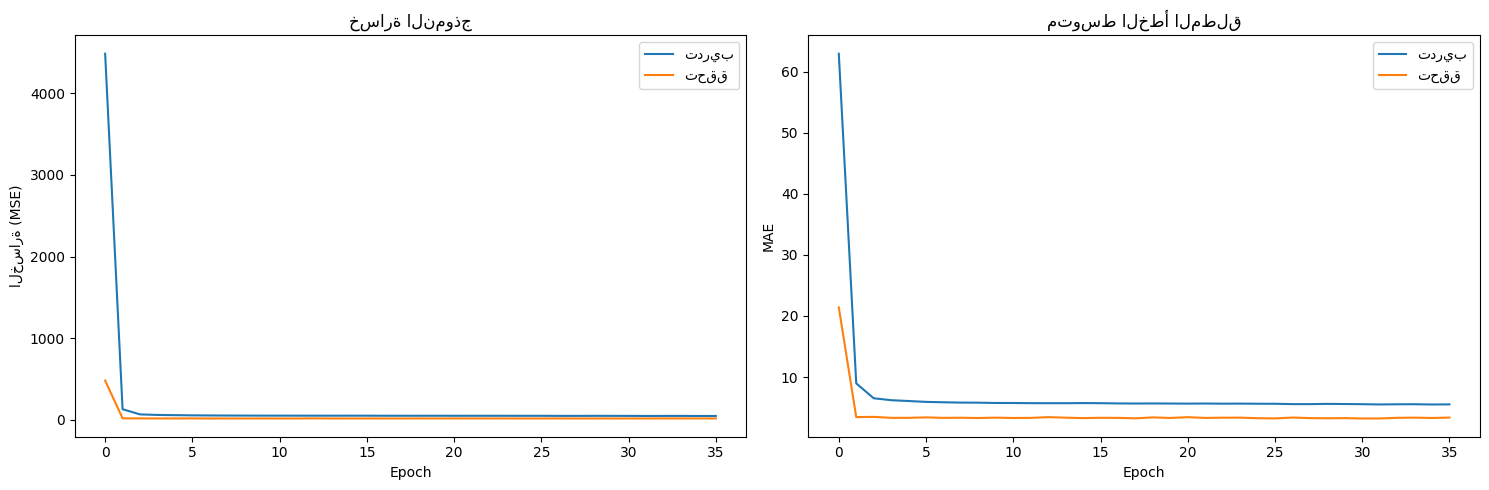

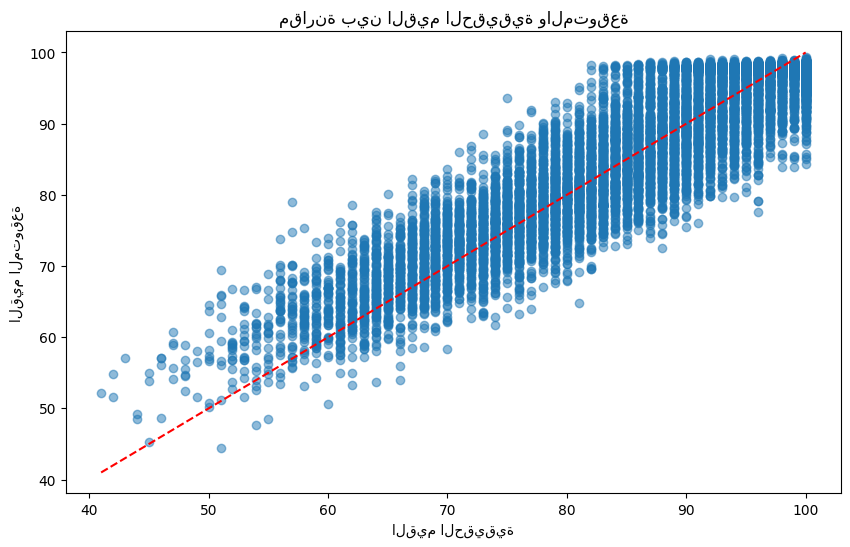

تقدير دقة النموذج: 86.93%


In [ ]:
# 1. تقييم النموذج على بيانات الاختبار
loss, mae = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"خسارة الاختبار (MSE): {loss:.4f}")
print(f"متوسط الخطأ المطلق (MAE): {mae:.4f}")

# 2. التنبؤ باستخدام بيانات الاختبار
y_pred = model.predict(X_test_processed)

# 3. حساب مقاييس الأداء
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"متوسط مربع الخطأ (MSE): {mse:.4f}")
print(f"الجذر التربيعي لمتوسط مربع الخطأ (RMSE): {rmse:.4f}")
print(f"متوسط الخطأ المطلق (MAE): {mae:.4f}")
print(f"معامل التحديد (R²): {r2:.4f} (كلما اقترب من 1 كان أفضل)")

# 4. رسوم بيانية لمعدلات الأخطاء
plt.figure(figsize=(15, 5))

# رسم خسارة التدريب والتحقق
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='تدريب')
plt.plot(history.history['val_loss'], label='تحقق')
plt.title('خسارة النموذج')
plt.xlabel('Epoch')
plt.ylabel('الخسارة (MSE)')
plt.legend()

# رسم متوسط الخطأ المطلق للتدريب والتحقق
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='تدريب')
plt.plot(history.history['val_mae'], label='تحقق')
plt.title('متوسط الخطأ المطلق')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# 5. رسم المقارنة بين القيم الحقيقية والمتوقعة
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('القيم الحقيقية')
plt.ylabel('القيم المتوقعة')
plt.title('مقارنة بين القيم الحقيقية والمتوقعة')
plt.show()

# حساب وعرض دقة النموذج كنسبة مئوية (تقريبية لمشكلة الانحدار)
accuracy_approx = 100 * r2
print(f"تقدير دقة النموذج: {accuracy_approx:.2f}%")

In [ ]:
# دالة للتنبؤ بدرجة اختبار طالب جديد
def predict_exam_score(student_data):
    """
    التنبؤ بدرجة اختبار طالب جديد

    المعلمات:
    - student_data: بيانات الطالب كـ DataFrame

    العائد:
    - درجة الاختبار المتوقعة
    """
    # معالجة بيانات الطالب
    student_processed = preprocessor.transform(student_data)

    # التنبؤ بالدرجة
    predicted_score = model.predict(student_processed)[0][0]

    return predicted_score

# مثال لاستخدام النموذج للتنبؤ
# إنشاء بيانات طالب جديد بناءً على البيانات التي أرسلتها
new_student = pd.DataFrame({
    'age': [20],
    'gender': ['Female'],
    'major': ['Business'],
    'study_hours_per_day': [5.0],
    'social_media_hours': [2.0],
    'netflix_hours': [1.0],
    'part_time_job': ['No'],
    'attendance_percentage': [80.0],
    'sleep_hours': [7.0],
    'diet_quality': ['Good'],
    'exercise_frequency': [3],
    'parental_education_level': ['Master'],
    'internet_quality': ['High'],
    'mental_health_rating': [8.0],
    'extracurricular_participation': ['Yes'],
    'previous_gpa': [3.5],
    'semester': [2],
    'stress_level': [4.0],
    'dropout_risk': ['No'],
    'social_activity': [2],
    'screen_time': [5.0],
    'study_environment': ['Library'],
    'access_to_tutoring': ['Yes'],
    'family_income_range': ['Medium'],
    'parental_support_level': [7],
    'motivation_level': [8],
    'exam_anxiety_score': [5],
    'learning_style': ['Visual'],
    'time_management_score': [7.0]
})

# التنبؤ بدرجة الاختبار
predicted_score = predict_exam_score(new_student)
print(f'الدرجة المتوقعة للطالب: {predicted_score:.2f}')

# أمثلة أخرى للتنبؤ (استناداً إلى الأمثلة التي أرسلتها)
example_students = pd.DataFrame([
    {
        'age': 24,
        'gender': 'Female',
        'major': 'Business',
        'study_hours_per_day': 7.4,
        'social_media_hours': 3.2,
        'netflix_hours': 1.0,
        'part_time_job': 'Yes',
        'attendance_percentage': 73.7,
        'sleep_hours': 5.9,
        'diet_quality': 'Poor',
        'exercise_frequency': 6,
        'parental_education_level': 'Some College',
        'internet_quality': 'Low',
        'mental_health_rating': 8.1,
        'extracurricular_participation': 'No',
        'previous_gpa': 3.31,
        'semester': 1,
        'stress_level': 5.9,
        'dropout_risk': 'No',
        'social_activity': 2,
        'screen_time': 13.1,
        'study_environment': 'Library',
        'access_to_tutoring': 'No',
        'family_income_range': 'High',
        'parental_support_level': 1,
        'motivation_level': 6,
        'exam_anxiety_score': 9,
        'learning_style': 'Kinesthetic',
        'time_management_score': 6.2
    },
    {
        'age': 16,
        'gender': 'Other',
        'major': 'Arts',
        'study_hours_per_day': 0,
        'social_media_hours': 2.7,
        'netflix_hours': 0.2,
        'part_time_job': 'No',
        'attendance_percentage': 44.1,
        'sleep_hours': 6.9,
        'diet_quality': 'Poor',
        'exercise_frequency': 2,
        'parental_education_level': 'Some College',
        'internet_quality': 'High',
        'mental_health_rating': 7.8,
        'extracurricular_participation': 'Yes',
        'previous_gpa': 4.0,
        'semester': 1,
        'stress_level': 3.7,
        'dropout_risk': 'No',
        'social_activity': 3,
        'screen_time': 3.9,
        'study_environment': 'Co-Learning Group',
        'access_to_tutoring': 'Yes',
        'family_income_range': 'Medium',
        'parental_support_level': 2,
        'motivation_level': 10,
        'exam_anxiety_score': 5,
        'learning_style': 'Visual',
        'time_management_score': 3.2
    }
])

for i, student in example_students.iterrows():
    score = predict_exam_score(pd.DataFrame([student]))
    print(f"الطالب {i+1}: الدرجة المتوقعة = {score:.2f} (الدرجة الفعلية: {[83, 100][i]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
الدرجة المتوقعة للطالب: 86.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
الطالب 1: الدرجة المتوقعة = 81.93 (الدرجة الفعلية: 83)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
الطالب 2: الدرجة المتوقعة = 97.32 (الدرجة الفعلية: 100)
